# README

Isotropic Reconstruction of Retina stacks

`train_data`: 

the corresponding low and high pairs of image patches (in python/numpy npz file format)

`test_data`: 

the test stacks used for the analysis. The anisotropic pixelsize is (dx,dy,dz) = (0.195um,0.195um,2um).

In [1]:
import numpy as np
from csbdeep.utils.plot_utils import plot_some
from matplotlib import pyplot as plt
import tifffile as tif

In [2]:
def npadrr_info(adrr: np.ndarray) -> None:
    print(f'shape: {adrr.shape}')
    print(f'dtype: {adrr.dtype}')

# 1. Train Data

In [3]:
train_path = './train_data/data_label.npz'
train_file = np.load(train_path)
print(train_file.files)

['Y', 'X']


### 1.1. LR
- 数量: 25391
- 通道: 2
- 尺寸：128x128

In [4]:
train_lr = train_file['X']
npadrr_info(train_lr)

shape: (25391, 2, 128, 128)
dtype: float32


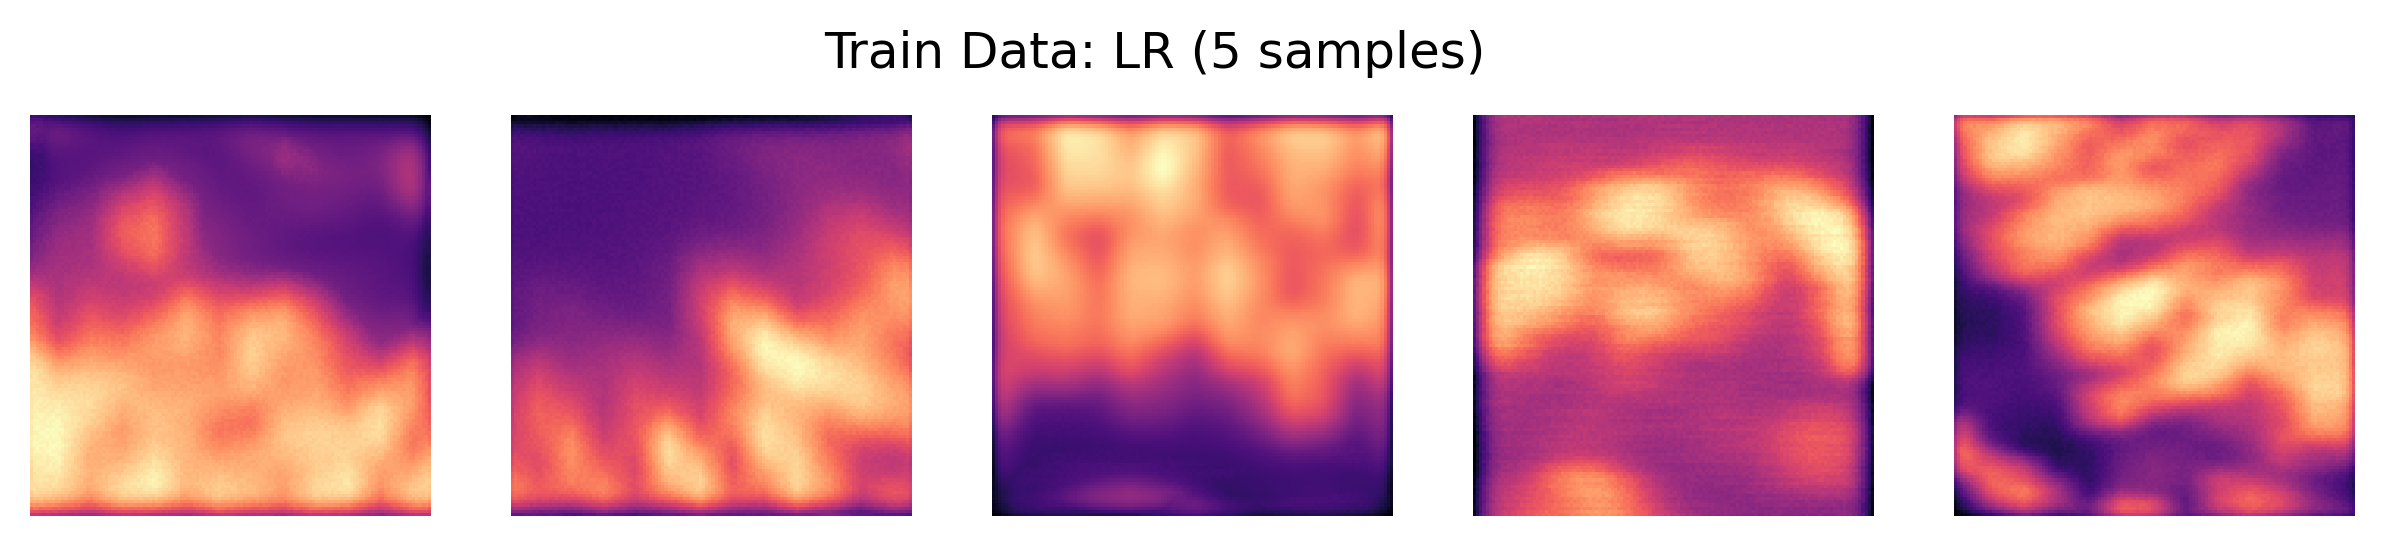

In [5]:
plt.figure(figsize=(10,2), dpi=300)
plt.suptitle('Train Data: LR (5 samples)')
plot_some(train_lr[0:5])
plt.show()

### 1.2. HR
- 数量: 25391
- 通道: 2
- 尺寸：128x128

In [6]:
train_hr = train_file['Y']
npadrr_info(train_hr)

shape: (25391, 2, 128, 128)
dtype: float32


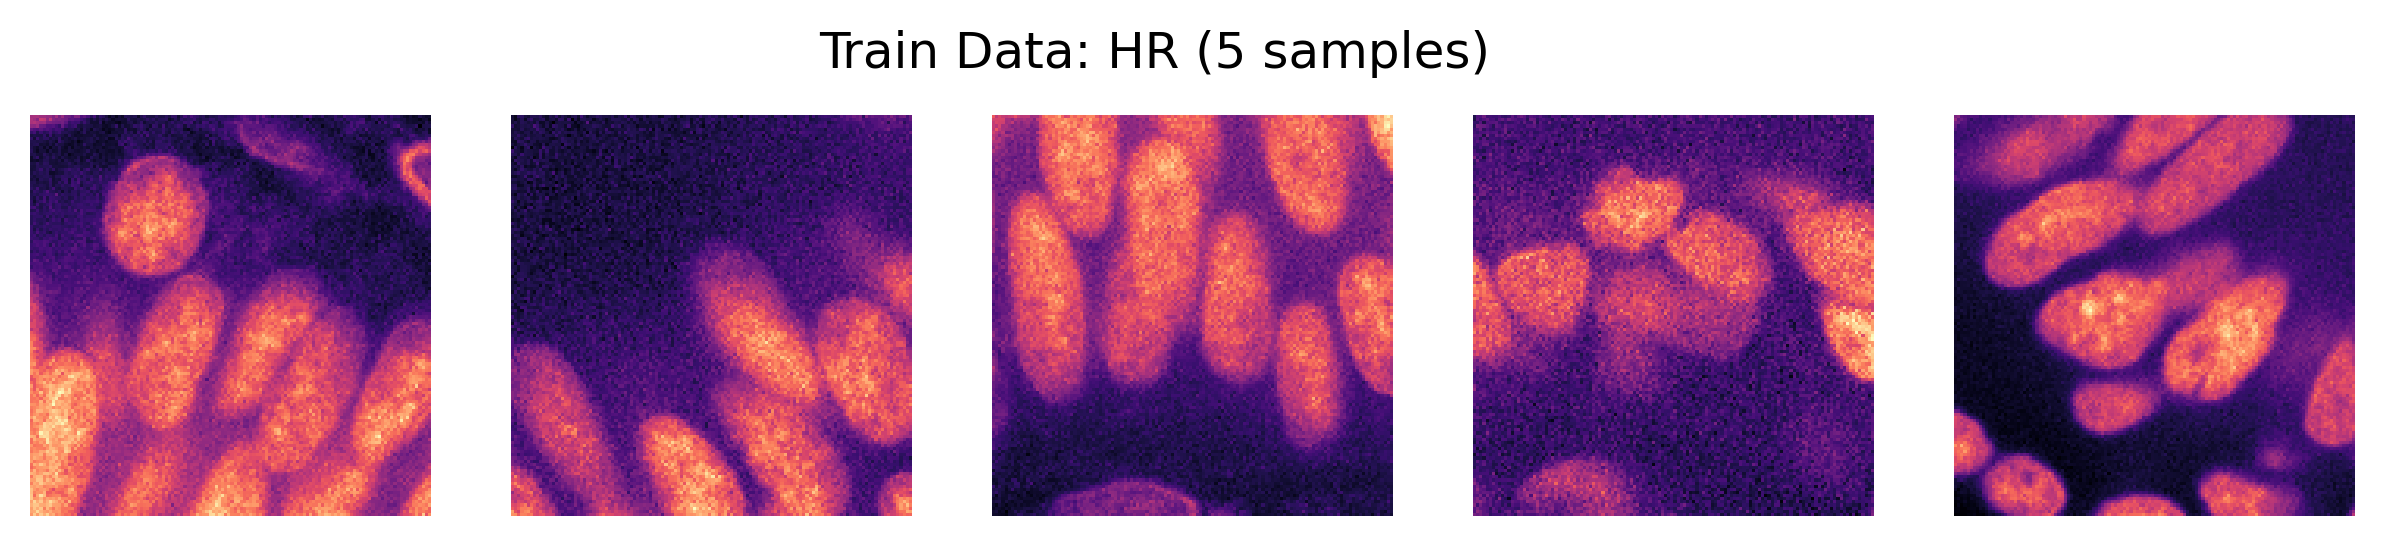

In [7]:
plt.figure(figsize=(10,2), dpi=300)
plt.suptitle('Train Data: HR (5 samples)')
plot_some(train_hr[0:5])
plt.show()

# 2. Test Set

- 数量: 1
- 通道: 2
- 尺寸: 1024(X轴) x 1024(Y轴) x 35(Z轴) 

In [8]:
test_path = './test_data/farred_RFP_GFP_2109175_2color_sub_10.20.tif'
test_file = tif.imread(test_path)
npadrr_info(test_file)

shape: (35, 2, 1024, 1024)
dtype: uint16


### 2.1. 径向(X-Y)
- 数量: 35
- 通道: 2
- 尺寸: 1024x1024

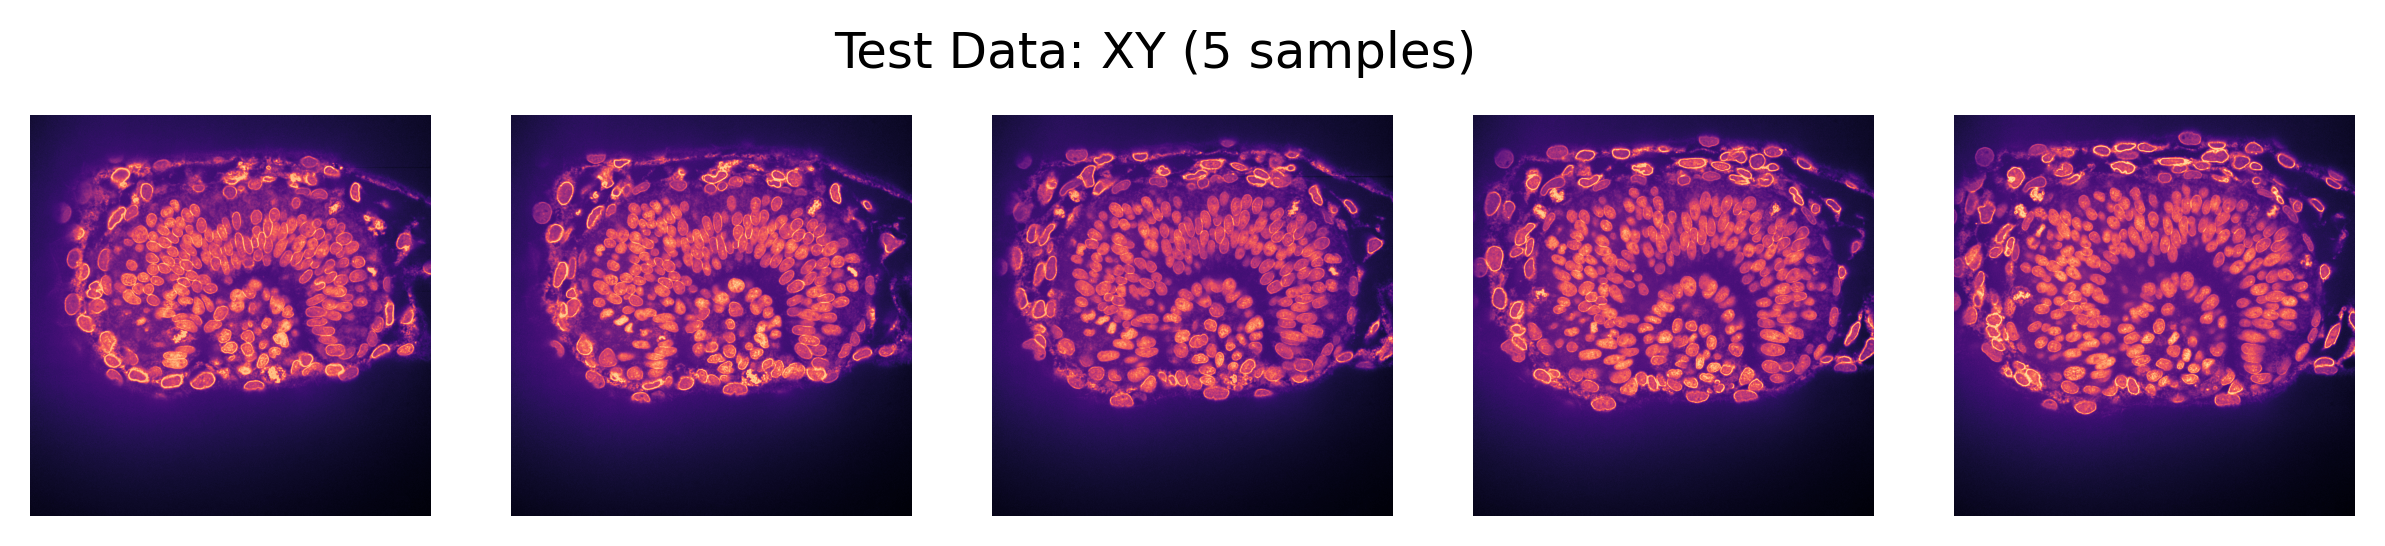

In [9]:
plt.figure(figsize=(10,2), dpi=300)
plt.suptitle('Test Data: XY (5 samples)')
plot_some(test_file[0:5])
plt.show()

### 2.1. 轴向(X-Z、Y-Z)
- 数量: 35
- 通道: 2
- 尺寸: 1024x35

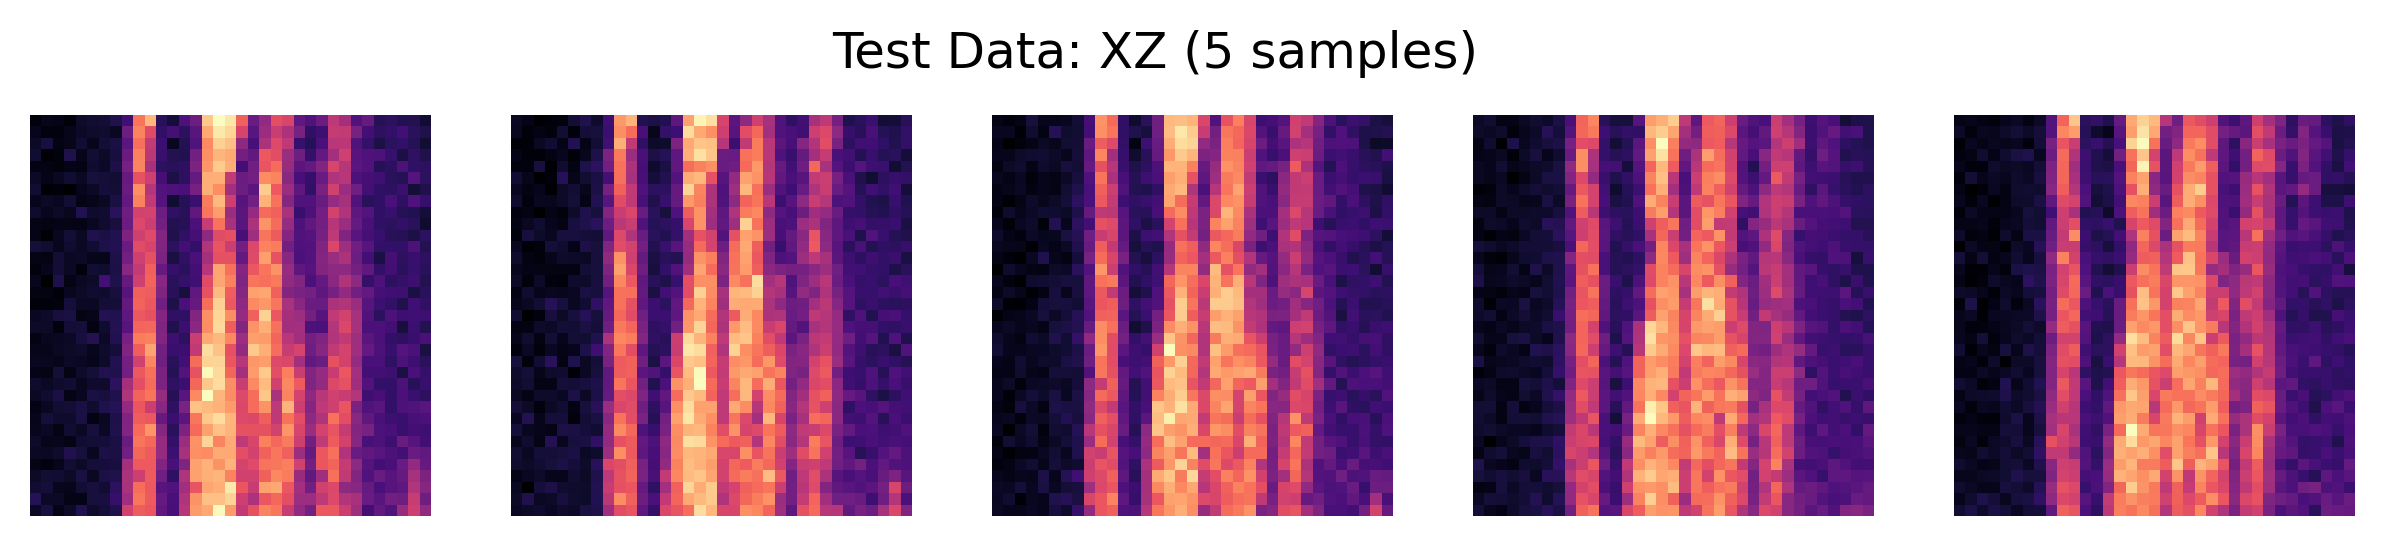

In [10]:
plt.figure(figsize=(10,2), dpi=300)
plt.suptitle('Test Data: XZ (5 samples)')
plot_some(np.transpose(test_file[:,:,0:5,100:100+35], (2,1,3,0)))
plt.show()